# Company Data Analysis

Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
sns.set_style("whitegrid")
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

Read Data and displaying first 5 rows

In [2]:
com_data = pd.read_csv('C:/Users/palla/OneDrive/Documents/3SC Case Study/Company_Data.csv')
com_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


array([<AxesSubplot:title={'center':'Advertising'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Age'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'CompPrice'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Education'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Income'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Population'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Price'}, xlabel='[US]'>,
       <AxesSubplot:title={'center':'Sales'}, xlabel='[US]'>,
       <AxesSubplot:>], dtype=object)

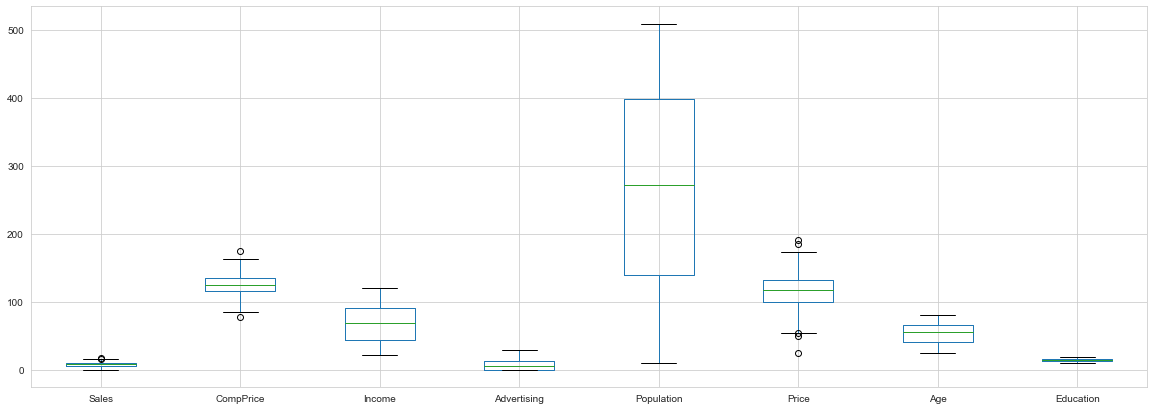

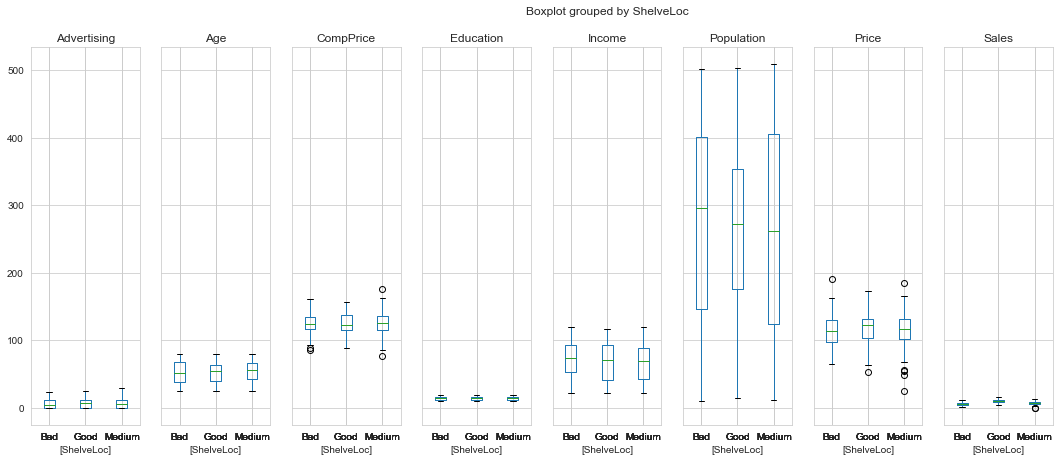

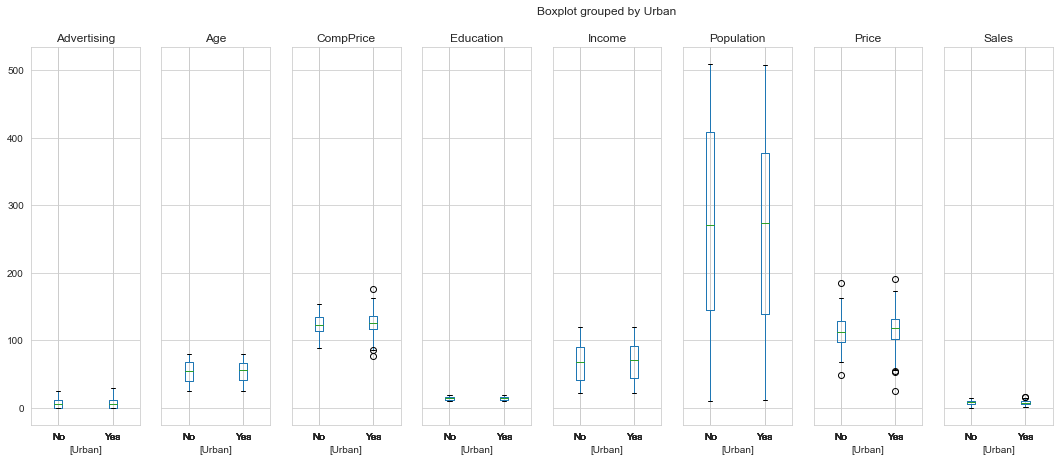

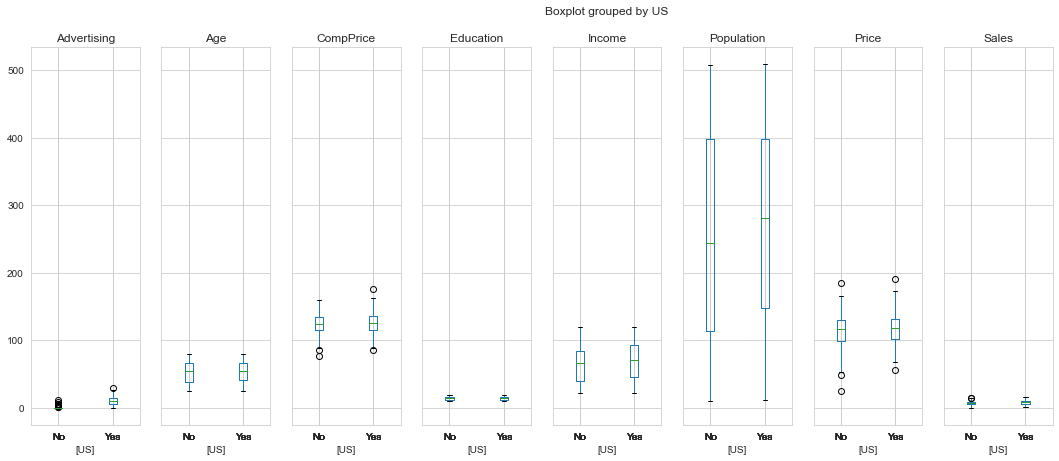

In [3]:
com_data.boxplot(figsize=(20,7))
com_data.boxplot(figsize=(20,7),by='ShelveLoc',layout=(1,9))
com_data.boxplot(figsize=(20,7),by='Urban',layout=(1,9))
com_data.boxplot(figsize=(20,7),by='US',layout=(1,9))

Analysis of target variable 'Sales' by plotting its distribution and outlier detection through Box and Violin Plot.
Sales is somewhat normally distributted with very few outliers

<AxesSubplot:ylabel='Sales'>

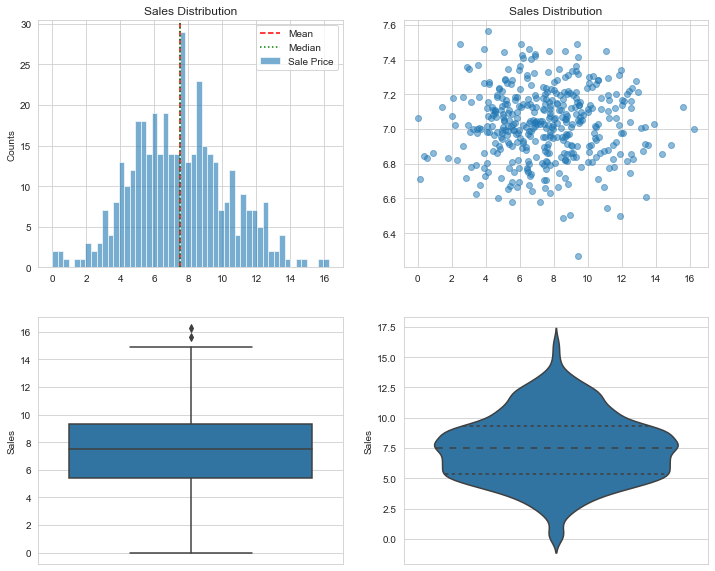

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
com_data['Sales'].hist(bins=50, label='Sale Price', alpha=0.6)
plt.axvline(np.mean(com_data['Sales']), ls='--', c='r', label="Mean")
plt.axvline(np.median(com_data['Sales']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Sales Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(com_data['Sales'], np.random.normal(7, 0.2, size=com_data.shape[0]), alpha=0.5)
plt.title("Sales Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="Sales", data=com_data)

plt.subplot(2, 2, 4)
sns.violinplot(y="Sales", data=com_data, inner="quartile", bw=0.2)

Distribution of Numerical Variables. Analysing deviation in all feature variables.
Can be inferred that Minimum of 'Price' is too less than median value, signifying the presence of outlier. Same goes with 'CompPrice'. Max 'Sales' value is too large as compared to median value.
Will also cross check this with z-score analysis.

In [5]:
com_data.describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.98,.99])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
10%,4.119000,106.000000,30.000000,0.000000,58.900000,87.000000,30.000000,10.000000
20%,5.066000,112.800000,39.000000,0.000000,110.400000,96.800000,36.000000,11.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
30%,5.867000,117.000000,48.000000,0.000000,160.000000,104.000000,43.000000,12.000000
40%,6.608000,121.000000,62.000000,2.000000,218.600000,110.000000,48.600000,13.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000


In [6]:
com_z = com_data.drop(columns=['ShelveLoc','Urban','US']).apply(zscore)
com_z.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-2.262079e-16,3.483325e-16,5.162537e-17,-6.161738e-17,1.454392e-16,-6.994405e-17,1.786071e-16,-2.534084e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.657722e+00,-3.132482e+00,-1.705035e+00,-9.989392e-01,-1.731343e+00,-3.881880e+00,-1.750460e+00,-1.490113e+00
25%,-7.467695e-01,-6.513081e-01,-9.268889e-01,-9.989392e-01,-8.549372e-01,-6.679480e-01,-8.388425e-01,-7.259527e-01
50%,-2.242444e-03,1.632351e-03,1.225357e-02,-2.461591e-01,4.864391e-02,5.095773e-02,7.277488e-02,3.820804e-02
75%,6.465597e-01,6.545728e-01,7.993444e-01,8.077330e-01,9.080650e-01,6.429978e-01,7.835274e-01,8.023688e-01
max,3.110590e+00,3.266335e+00,1.836873e+00,3.367185e+00,1.658785e+00,3.180312e+00,1.648791e+00,1.566529e+00


After identifying outliers, replacing outliers with value at the edge of 3*standard deviation
This can vary from problem to problem, sometime we only consider twice of std. Outliers can also be considered any value outside interquartile range.

In [7]:
for col in com_data.select_dtypes(include=[np.number]).columns:
    com_data[col] = np.where(com_data[col] < com_data[col].mean()-3*com_data[col].std(), com_data[col].mean()-3*com_data[col].std(),com_data[col])
    com_data[col] = np.where(com_data[col] > com_data[col].mean()+3*com_data[col].std(), com_data[col].mean()+3*com_data[col].std(),com_data[col])

Showing changed distribution after handling outliers.

In [8]:
com_data.describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.98,.99])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.495572,124.969774,68.657500,6.628965,264.840000,115.835257,53.322500,13.900000
std,2.821808,15.287435,27.986037,6.631086,147.376436,23.460732,16.200297,2.620528
min,0.000000,78.971465,21.000000,0.000000,10.000000,44.765007,25.000000,10.000000
10%,4.119000,106.000000,30.000000,0.000000,58.900000,87.000000,30.000000,10.000000
20%,5.066000,112.800000,39.000000,0.000000,110.400000,96.800000,36.000000,11.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
30%,5.867000,117.000000,48.000000,0.000000,160.000000,104.000000,43.000000,12.000000
40%,6.608000,121.000000,62.000000,2.000000,218.600000,110.000000,48.600000,13.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000


In [9]:
com_data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.063904,0.152158,0.269354,0.050414,-0.445577,-0.231851,-0.051702
CompPrice,0.063904,1.000000,-0.080811,-0.029657,-0.096221,0.581966,-0.100601,0.026263
Income,0.152158,-0.080811,1.000000,0.059285,-0.007877,-0.057003,-0.004670,-0.056855
Advertising,0.269354,-0.029657,0.059285,1.000000,0.265470,0.040880,-0.004553,-0.033030
Population,0.050414,-0.096221,-0.007877,0.265470,1.000000,-0.015308,-0.042663,-0.106378
Price,-0.445577,0.581966,-0.057003,0.040880,-0.015308,1.000000,-0.102763,0.015116
Age,-0.231851,-0.100601,-0.004670,-0.004553,-0.042663,-0.102763,1.000000,0.006488
Education,-0.051702,0.026263,-0.056855,-0.033030,-0.106378,0.015116,0.006488,1.000000


In [10]:
vif_data = pd.DataFrame() 
vif_data["feature"] = com_z.columns
vif_data["VIF"] = [variance_inflation_factor(com_z.values, i) 
                          for i in range(len(com_z.columns))]
vif_data

,feature,VIF
0,Sales,2.181789
1,CompPrice,2.117078
2,Income,1.050096
3,Advertising,1.291715
4,Population,1.101688
5,Price,2.847082
6,Age,1.161194
7,Education,1.017994


Convert categorical data using one hot encoding. Dropping first value, i.e. creating (p-1) feature in order to avoid collinearity.

In [11]:
df_encoded = pd.get_dummies(com_data, columns=['ShelveLoc','Urban','US'], drop_first=True)
df_encoded.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,0,0,1,1
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,1,0,1,1
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,0,1,1,1
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,0,1,1,1
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,0,0,1,0


Train Test split 80:20

In [12]:
X = df_encoded.drop(columns=['Sales'])
y = df_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
sc = StandardScaler()
 
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
pca = PCA(n_components = 11)
 
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16900549, 0.15608681, 0.1393529 , 0.10417452, 0.09565273,
       0.09031468, 0.07546766, 0.07355723, 0.03781139, 0.03374382,
       0.02483277])

Training Random Forest Regressor Model.

In [14]:
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Predicting for test Data and calculating error.

In [15]:
Y_pred = regressor.predict(X_test)
X_test['Sales'] = y_test
X_test['Predicted Sales'] = Y_pred
X_test['Error'] = X_test['Sales']-X_test['Predicted Sales']

In [16]:
MSE = (X_test['Error']**2).mean()
MAE = X_test['Error'].abs().mean()
MAPE = (X_test['Error'].abs()/X_test['Sales']).mean()
print(f'MSE : {MSE} , MAE : {MAE} , MAPE : {MAPE}')

MSE : 2.9770079523701116 , MAE : 1.412513376830256 , MAPE : 0.23778656135104956


Feature importance using Random Forest Gini Index.
As can be seen, 'Price' is the most important feature with 32% importance.
Followed by ShelveLoc and Age.
CompPrice and Edu

In [17]:
importance = regressor.feature_importances_
imp = pd.DataFrame([X_train.columns,list(importance)])
imp

,0,1,2,3,4,5,6,7,8,9,10
0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
1,0.092416,0.051127,0.080163,0.032693,0.323246,0.116851,0.031193,0.199492,0.059194,0.006453,0.007172


Again Price shows the maximum importance followed by Population & CompPrice.

In [18]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
importance_perm = results.importances_mean
imp_perm = pd.DataFrame([X_train.columns,list(importance_perm)])
imp_perm

,0,1,2,3,4,5,6,7,8,9,10
0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
1,0.259856,0.361648,0.136336,1.513691,2.080453,0.310392,-0.02918,0.0,0.000253,0.001262,0.0


As can be observed from both methods, feature 'US' & 'Urban' are not significant in predicting the 'Sales' so can be dropped.

# End Of Analysis